# Visualizing 2D Basketball Keypoints

In [1]:
import json
import os
import glob
import numpy as np
import pdb
from tempfile import NamedTemporaryFile
from IPython.display import HTML
from matplotlib import animation
import imageio
import matplotlib.pyplot as plt
import tempfile
import random
import os
%matplotlib inline

In [ ]:
VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

def anim_to_html_windows(anim):
    plt.rcParams["animation.convert_path"] = 'C:/ffmpeg/bin/ffmpeg.exe'
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.avi') as f:
            anim.save(f.name, writer="ffmpeg")
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

def display_animation_windows(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html_windows(anim))

In [14]:
## setting up some file location info.
label_rootdir = 'C:/Users/JENNY/Desktop/Jenny Sokolsky/Cal Junior year/Data X/Pose Data/labels/{}/{}/{}/{}.json'
image_rootdir = 'C:/Users/JENNY/Desktop/Jenny Sokolsky/Cal Junior year/Data X/Pose Data/frames/{}/{}/{}/{}'
game_code = 1571133
shot_type = 'made'
sequence = '03'
frame_id = '002098057'

json_file = label_rootdir.format(game_code,shot_type,sequence,frame_id)

coco_joint_names = [
        'R Ankle', 'R Knee', 'R Hip', 'L Hip', 'L Knee', 'L Ankle', 'R Wrist',
        'R Elbow', 'R Shoulder', 'L Shoulder', 'L Elbow', 'L Wrist', 'Neck',
        'Head', 'Nose', 'L Eye', 'R Eye', 'L Ear', 'R Ear'
    ]
imlist = sorted(glob.glob(image_rootdir.format(game_code,shot_type,sequence,'*.jpg')))
imlist = [im.replace('\\','/') for im in imlist]
jsonlist = sorted(glob.glob(label_rootdir.format(game_code,shot_type,sequence,'*')))
jsonlist = [js.replace('\\','/') for js in jsonlist]

In [ ]:
# open one json file
with open(json_file,'rb') as f:
    data_json = json.load(f)
# read corresponding image
fig = plt.figure(figsize=(20,10))
imfile = image_rootdir.format(game_code,shot_type,sequence,data_json['imloc'].split('/')[-1])
im = imageio.imread(imfile)
implot = plt.imshow(im)
for k in coco_joint_names:
    plt.plot(data_json[k]['x'],data_json[k]['y'],'ro')

In [4]:
def viewPose(imlist,jsonlist,number_frames): #,occl):
    from matplotlib import pyplot as plt
    from scipy import misc
    from matplotlib import animation
    fig = plt.figure(figsize=(20,10))
    data = imageio.imread(imlist[0])
    with open(jsonlist[0],'rb') as f:
        data_json = json.load(f)
    #pdb.set_trace()
    #data1 = np.zeros((nx, ny))
    im = plt.imshow(data) #, cmap='gist_gray_r', vmin=0, vmax=1)
    ax = plt.gca()
    line_rightup, = ax.plot([],[],'ro-',lw=2)
    line_head, = ax.plot([],[],'go-',lw=2)
    line_rightlo, = ax.plot([],[],'yo-',lw=2)
    line_leftup, = ax.plot([],[],'mo-',lw=2)
    line_leftlo, = ax.plot([],[],'co-',lw=2)
    def init():
        data = imageio.imread('{}{}'.format(imdir,imlist[0]))
        im.set_data(data)
        line_head.set_data([data_json['Head']['x'],data_json['Neck']['x']],[data_json['Head']['y'],data_json['Neck']['y']])
        #         line_rightup.set_data([],[])
        #         line_rightlo.set_data([],[])
        #         line_leftup.set_data([],[])
        #         line_leftlo.set_data([],[])
        return im,line_head,#line_rightup,line_rightlo,line_leftup,line_leftlo,

    def animate(i):
        imname = imlist[i]
        img = imageio.imread(imname)
        im.set_data(img)
        with open(jsonlist[i],'rb') as f:
            data_json = json.load(f)
        line_head.set_data([data_json['Head']['x'],data_json['Neck']['x']],[data_json['Head']['y'],data_json['Neck']['y']])
        #         line_rightup.set_data(skel[i]['x'][0:2],skel[i]['y'][0:2])
        #         line_rightlo.set_data(skel[i]['x'][6:8],skel[i]['y'][6:8])
        #         line_leftup.set_data(skel[i]['x'][8:10],skel[i]['y'][8:10])
        #         line_leftlo.set_data(skel[i]['x'][14:16],skel[i]['y'][14:16])
        return im,line_head,#line_rightup,line_rightlo,line_leftup,line_leftlo,

    anim = animation.FuncAnimation(fig, animate, frames=number_frames,
                               interval=181)
    print('returning anim')
    return anim
    # print displaying animation
    #print('displaying animation')


returning anim
done?


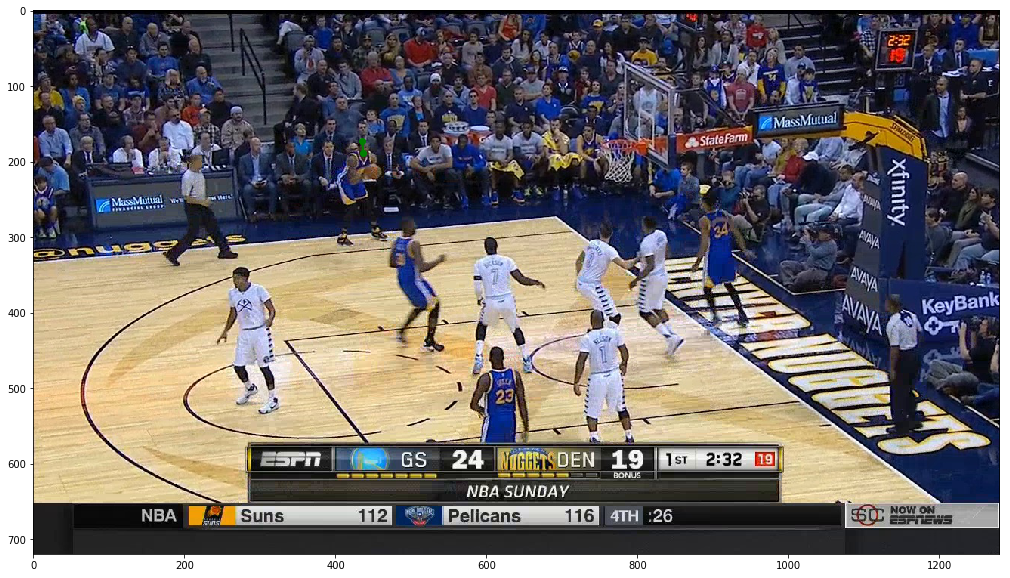

In [15]:
anim = viewPose(imlist,jsonlist,100)
#plt.rcParams["animation.convert_path"] = "C:/Program Files/ImageMagick-7.0.8-Q16/magick.exe"
plt.rcParams["animation.convert_path"] = 'C:/ffmpeg/bin/ffmpeg.exe'
anim.save("test_seq3.avi",writer="ffmpeg",fps=25)
print('done?')
#display_animation(anim)

In [10]:
display_animation_windows(anim)

NameError: name 'HTMLWriter' is not defined

In [ ]:
#plt.rcParams["animation.convert_path"] = 'C:/ffmpeg/bin/ffmpeg.exe'
plt.rcParams["animation.convert_path"] = "C:/Program Files/ImageMagick-7.0.8-Q16/magick.exe"

In [ ]:
data_json